### 패키지 참조

In [1]:
from pandas import DataFrame,read_csv,read_excel,merge,melt,pivot_table
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import sys
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from factor_analyzer.factor_analyzer import calculate_kmo

### 폰트세팅

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.unicode_minus"] = False

### 데이터 불러오기

In [3]:
origin=read_excel('행정동병합최종.xlsx')
origin

,Unnamed: 0,시도명,시군구코드,시군구명,행정동코드,행정동코드_수정,읍면동명,생성일자,말소일자,지하철역_수,...,세대당공원면적minmax,수변점수,행정동별버스정류장수,행정동별유통업체수,공공자전거대여소수,인구밀도,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,그린지수minmax
0,0,서울특별시,11110,종로구,1111051500,11110515,청운효자동,20081101,0,0,...,0.352898,0,32,0,3,4552.529183,0.062205,0.166880,0.133927,0.212495
1,1,서울특별시,11110,종로구,1111053000,11110530,사직동,19880423,0,2,...,0.063554,0,27,0,12,7611.382114,0.038557,0.044126,0.184545,0.038269
2,2,서울특별시,11110,종로구,1111054000,11110540,삼청동,19880423,0,0,...,1.000000,0,16,0,5,1728.859060,0.182711,0.118277,0.233276,0.602143
3,3,서울특별시,11110,종로구,1111055000,11110550,부암동,19880423,0,0,...,0.000000,10,34,0,5,4130.837004,0.038414,0.144440,0.162233,0.602143
4,4,서울특별시,11110,종로구,1111056000,11110560,평창동,19880423,0,0,...,0.001192,10,54,0,5,1990.755355,0.107249,0.658702,0.560716,0.602861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,421,서울특별시,11740,강동구,1174065000,11740650,성내제2동,19880423,0,3,...,0.000188,4,18,1,5,34780.597015,0.002084,0.027923,0.032763,0.240970
402,422,서울특별시,11740,강동구,1174066000,11740660,성내제3동,19880423,0,1,...,0.000366,9,15,1,6,32228.169014,0.001992,0.037726,0.025227,0.542149
403,423,서울특별시,11740,강동구,1174068500,11740685,길동,20080707,0,1,...,0.004297,0,36,2,7,28038.509317,0.005104,0.082530,0.046456,0.002587
404,424,서울특별시,11740,강동구,1174069000,11740690,둔촌제1동,19880423,0,1,...,0.000000,7,9,0,4,76.086957,0.000000,0.708442,0.000000,0.421500


### 읍면동 및 지수만 뽑아내기

In [4]:
origin1=origin.filter(['읍면동명','그린지수minmax','여가생활지수minmax','사회적약자_지원_인프라_밀집도minmax','접근성지수minmax'])
origin1.head(2)

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,청운효자동,0.212495,0.062205,0.166880,0.133927
1,사직동,0.038269,0.038557,0.044126,0.184545


In [5]:
origin1.isna().sum()

읍면동명                      0
그린지수minmax                0
여가생활지수minmax              0
사회적약자_지원_인프라_밀집도minmax    0
접근성지수minmax               0
dtype: int64

In [6]:
origin2=origin1.copy()
origin2.head(2)

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,청운효자동,0.212495,0.062205,0.166880,0.133927
1,사직동,0.038269,0.038557,0.044126,0.184545


### 그린지수, 여가생활지수

In [7]:
origin3=origin2.copy()
X = origin3.iloc[:,[1,2]].values #x값으로 공원면적,여가생활지수 지정
X[:5] #5개까지만 보이게

array([[0.21249473, 0.06220496],
       [0.03826857, 0.0385567 ],
       [0.60214289, 0.18271093],
       [0.60214289, 0.03841368],
       [0.60286054, 0.1072489 ]])

#### 엘보우 메소드로 최적의 k값 예상

<Axes: >

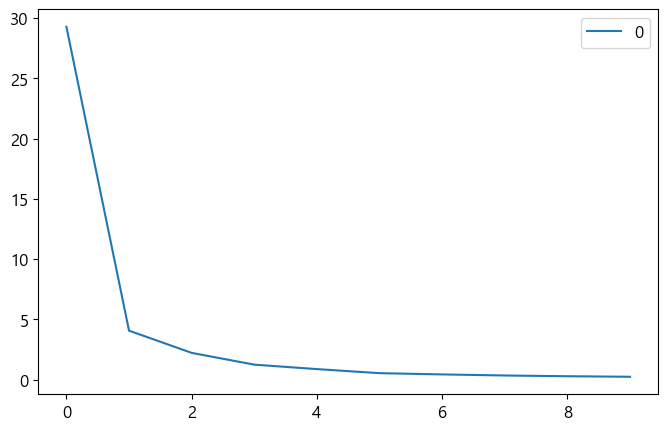

In [8]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k,n_init=10,max_iter=100).fit(X)
    value = kmeans.inertia_
    inertia.append(value)

DataFrame(inertia).plot()

> 엘보우 그래프 확인 결과 4개에서부터 완만히 떨어지는것으로 추정되어 군집수는 4개로 결정

#### 실루엣 스코어로 최적의 k값 예상

In [9]:
origin3_3=origin3.drop('읍면동명',axis=1)

In [10]:
score_list=[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k,n_init=10,max_iter=100)
    kmeans.fit(origin3_3)
    y_pred=kmeans.predict(origin3_3)
    score=silhouette_score(origin3_3,y_pred)
    score_list.append(score)

score_list

[0.7007280514933321,
 0.7252921956125256,
 0.6508983445429742,
 0.6111276449207047,
 0.6162973897209204,
 0.5840343682271906,
 0.5785962643021278,
 0.5798281535100924,
 0.5875675539777894]

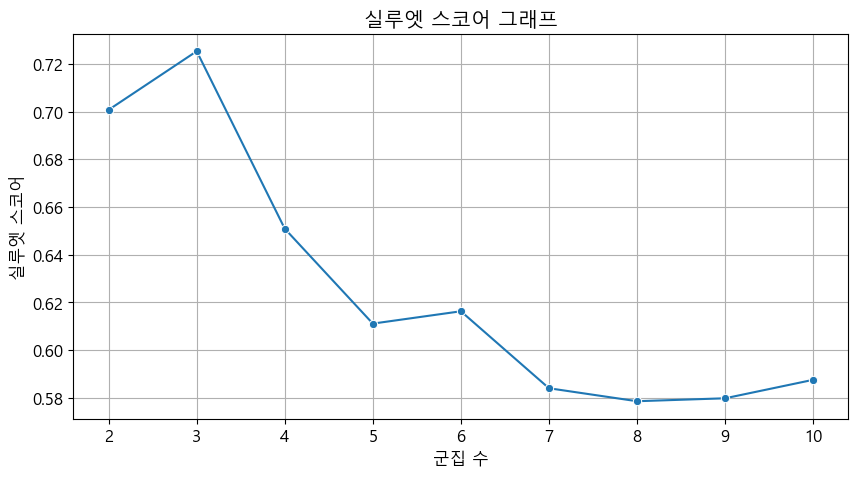

In [11]:
plt.figure(figsize=(10,5))
sb.lineplot(x=range(2,11),y=score_list,marker='o')
plt.title('실루엣 스코어 그래프')
plt.xlabel('군집 수')
plt.ylabel('실루엣 스코어')
plt.grid()
plt.show()
plt.close()

> 실루엣 스코어 확인 결과 마찬가지로 4로 설정하는게 가장 좋은 점수가 나옴.

In [43]:
#n_clusters=9,n_init=10,max_iter=100
kmeans = KMeans(n_clusters=6,n_init=10,max_iter=100).fit(X) #군집 4개로 나누겠다
origin3['cluster_id'] = kmeans.labels_
origin3.head()

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.062205,0.166880,0.133927,4
1,사직동,0.038269,0.038557,0.044126,0.184545,1
2,삼청동,0.602143,0.182711,0.118277,0.233276,0
3,부암동,0.602143,0.038414,0.144440,0.162233,0
4,평창동,0.602861,0.107249,0.658702,0.560716,0


c:\Users\kiman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


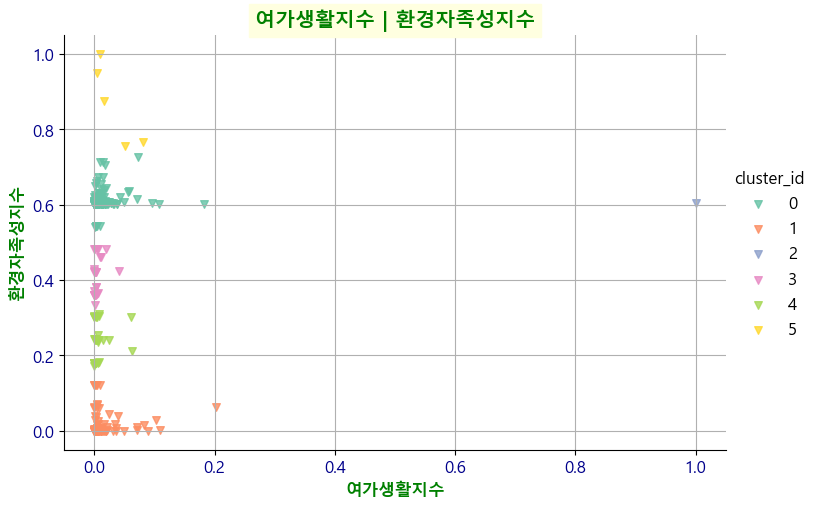

In [44]:
sb.lmplot(x='여가생활지수minmax', y='그린지수minmax', data=origin3, 
          fit_reg=False, scatter_kws={"s": 30}, hue="cluster_id",aspect=1.5,palette='Set2',markers='v')
plt.title("여가생활지수 | 환경자족성지수", color='green',fontweight='bold',backgroundcolor='lightyellow')
plt.xlabel('여가생활지수', color='green',fontweight='bold')
plt.ylabel('환경자족성지수', color='green',fontweight='bold')
plt.xticks(fontsize=12,color='darkblue')
plt.yticks(fontsize=12,color='darkblue')
plt.grid()
plt.show()
plt.close()

In [45]:
origin3[origin3['cluster_id']==2]
origin3_final=DataFrame(origin3[origin3['cluster_id']==2])
origin3[origin3['cluster_id']==5]
origin3_final1=DataFrame(origin3[origin3['cluster_id']==5])

In [46]:
origin3_final

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
330,반포본동,0.603899,1.0,0.992845,0.27321,2


In [47]:
origin3_final1

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
94,면목제4동,0.949815,0.004376,0.033877,0.028933,5
160,중계제4동,1.000000,0.009503,0.071953,0.033002,5
162,상계제1동,0.874020,0.016684,0.477411,0.181578,5
340,양재제1동,0.766479,0.080960,0.366162,0.342199,5
371,오륜동,0.755072,0.050203,0.017347,0.302946,5


In [48]:
origin333=origin3_final.merge(origin3_final1,on='읍면동명',how='outer')
origin333.head()

,읍면동명,그린지수minmax_x,여가생활지수minmax_x,사회적약자_지원_인프라_밀집도minmax_x,접근성지수minmax_x,cluster_id_x,그린지수minmax_y,여가생활지수minmax_y,사회적약자_지원_인프라_밀집도minmax_y,접근성지수minmax_y,cluster_id_y
0,반포본동,0.603899,1.0,0.992845,0.27321,2.0,NaN,NaN,NaN,NaN,NaN
1,면목제4동,NaN,NaN,NaN,NaN,NaN,0.949815,0.004376,0.033877,0.028933,5.0
2,중계제4동,NaN,NaN,NaN,NaN,NaN,1.000000,0.009503,0.071953,0.033002,5.0
3,상계제1동,NaN,NaN,NaN,NaN,NaN,0.874020,0.016684,0.477411,0.181578,5.0
4,양재제1동,NaN,NaN,NaN,NaN,NaN,0.766479,0.080960,0.366162,0.342199,5.0


In [49]:
origin333_final=DataFrame(origin333)
origin333_final.to_excel('./교집합결과/여가생활,그린지수voting1.xlsx')

> - 군집 분류는 기본적으로 서로 잘 모여있는게 이상적이나 우리 조는 특정 변수를 조합하여 만든 파생지수이므로 서로 몰려있으면서 수치가 높은 
값을 찾아야 하는게 목표<br>
> - 군집 확인 결과 비대칭적으로 몰려있는 것을 확인할 수 있음. <br>
> - 군집으로 볼 때 `0`번 군집이 그린지수가 높으면서 문화시민지수도 어느정도 포함하고 있어 최적의 군집으로 선정<br>

> 이상적인 군집은 +-로 구분되는 것이다.<br>
다만, 현재 분석 결과에서 문화시민지수의 분포는 비슷하게 도출되었다.<br>
따라서 그린지수가 가장 긍정적인 군집 `0`을 이상적인 지역이라고 판단하기로 결정, 행정동을 추출.

### 그린지수, 사회적 약자지수

In [50]:
origin4=origin2.copy()
Y = origin4.iloc[:,[1,3]].values #x값으로 그린지수,사회적약자지수 지정
Y[:5]

array([[0.21249473, 0.16688035],
       [0.03826857, 0.04412614],
       [0.60214289, 0.11827713],
       [0.60214289, 0.14444004],
       [0.60286054, 0.65870172]])

#### 엘보우 메소드로 최적의 k값 예상

<Axes: >

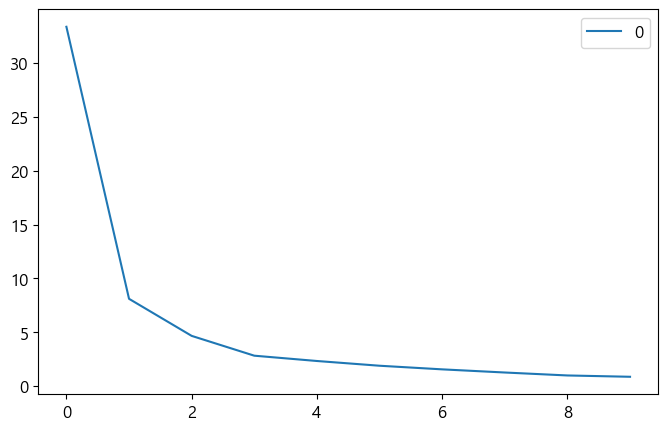

In [51]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k,n_init=10,max_iter=100).fit(Y)
    value = kmeans.inertia_
    inertia.append(value)

DataFrame(inertia).plot()

> 엘보우 그래프 확인 결과 분석가 판단하에 3개에서 완만하게 떨어지는것으로 판단하여 군집수는 3개로 결정함

#### 실루엣 스코어로 최적의 k값 예상

In [52]:
origin4_4=origin4.drop('읍면동명',axis=1)

실루엣 점수: 0.651


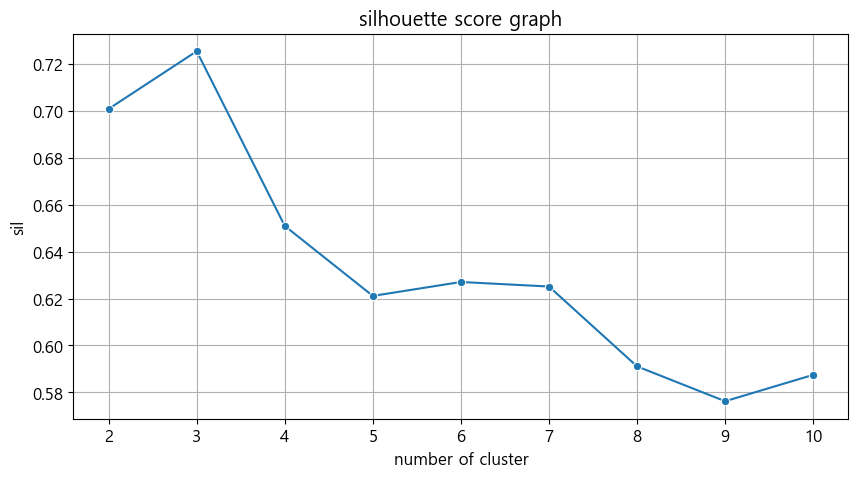

In [53]:
kmeans=KMeans(n_clusters=4,n_init=10,max_iter=100)
kmeans.fit(origin4_4)
y_pred=kmeans.predict(origin4_4)
score=silhouette_score(origin4_4,y_pred)

print("실루엣 점수: {0:.3f}".format(score))

score_list1=[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k,n_init=10,max_iter=100)
    kmeans.fit(origin4_4)
    y_pred=kmeans.predict(origin4_4)
    score=silhouette_score(origin4_4,y_pred)
    score_list1.append(score)

score_list1

plt.figure(figsize=(10,5))
sb.lineplot(x=range(2,11),y=score_list1,marker='o')
plt.title('silhouette score graph')
plt.xlabel('number of cluster')
plt.ylabel('sil')
plt.grid()
plt.show()
plt.close()

> 실루엣 스코어 확인 결과 마찬가지로 군집을 4개로 설정했을 때 가장 높은 점수가 나왔으나 분석가 주관적 판단하에 3으로 결정

In [54]:
kmeans = KMeans(n_clusters=6,n_init=10,max_iter=100).fit(Y) #군집 6개로 나누겠다
origin4['cluster_id'] = kmeans.labels_
origin4.head()

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.062205,0.166880,0.133927,3
1,사직동,0.038269,0.038557,0.044126,0.184545,0
2,삼청동,0.602143,0.182711,0.118277,0.233276,5
3,부암동,0.602143,0.038414,0.144440,0.162233,5
4,평창동,0.602861,0.107249,0.658702,0.560716,2


c:\Users\kiman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


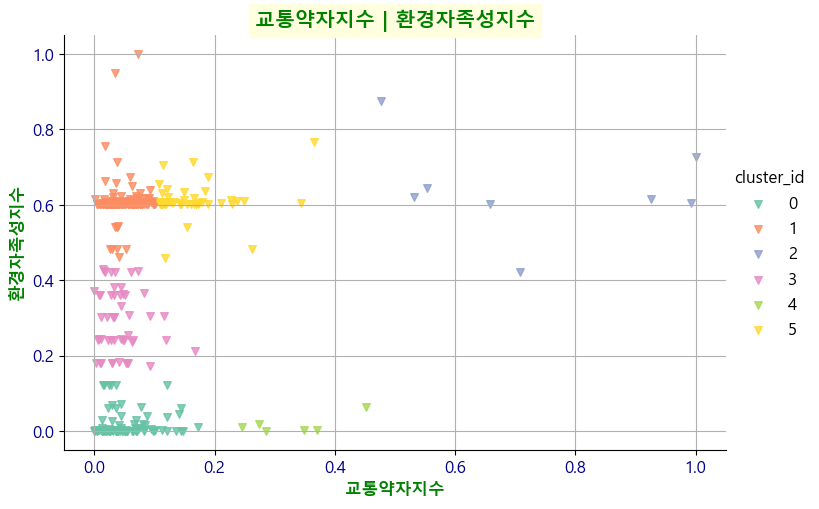

In [55]:
sb.lmplot(x='사회적약자_지원_인프라_밀집도minmax', y='그린지수minmax', data=origin4, 
          fit_reg=False, scatter_kws={"s": 30}, hue="cluster_id",aspect=1.5,palette='Set2',markers='v')
plt.title("교통약자지수 | 환경자족성지수", color='green',fontweight='bold',backgroundcolor='lightyellow')
plt.xlabel('교통약자지수', color='green',fontweight='bold')
plt.ylabel('환경자족성지수', color='green',fontweight='bold')
plt.xticks(fontsize=12,color='darkblue')
plt.yticks(fontsize=12,color='darkblue')
plt.grid()
plt.show()
plt.close()

In [56]:
origin4[origin4['cluster_id']==2]

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
4,평창동,0.602861,0.107249,0.658702,0.560716,2
162,상계제1동,0.874020,0.016684,0.477411,0.181578,2
213,상암동,0.726448,0.072779,1.000000,0.689607,2
243,가양제1동,0.645265,0.020125,0.553051,0.483549,2
275,여의동,0.614035,0.071520,0.925674,1.000000,2
330,반포본동,0.603899,1.000000,0.992845,0.273210,2
359,세곡동,0.621029,0.043102,0.531887,0.269476,2
404,둔촌제1동,0.421500,0.000000,0.708442,0.000000,2


In [57]:
origin4_final=DataFrame(origin4[origin4['cluster_id']==2])
origin4_final.to_excel('./교집합결과/사회적약자,그린지수voting1.xlsx')

> - 군집 확인 결과 데이터가 수직으로 분포되어있는 것을 확인. 
> - 따라서 그린지수가 높은 `0`번 군집을 채택

> 사회적약자지수가 비교적 비슷하게 분포되어있는 만큼 그린지수가 높은 군집 `0` 지역을 이상적인 지역으로 판단하기로 결정.<br>
비록 군집 `0`의 분포가 상대적으로 산개되어 있지만 분석 목적은 밀집도가 아닌 가장 이상적인 지역을 도출하는 것임으로 군집 `0`을 사용하는 것이 타당하다고 판단.

### 그린지수, 접근성 지수

In [58]:
origin5=origin2.copy()
Z = origin5.iloc[:,[1,4]].values #x값으로 그린지수,접근성지수 지정
Z[:5]

array([[0.21249473, 0.1339273 ],
       [0.03826857, 0.18454452],
       [0.60214289, 0.23327645],
       [0.60214289, 0.16223314],
       [0.60286054, 0.56071557]])

#### 엘보우 메소드로 최적의 k값 예상

<Axes: >

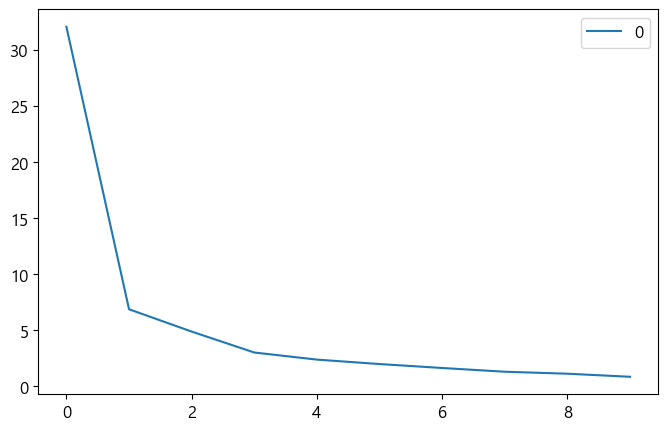

In [59]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k,n_init=10,max_iter=100).fit(Z)
    value = kmeans.inertia_
    inertia.append(value)

DataFrame(inertia).plot()

> 엘보우 그래프 확인 결과 4개에서 완만히 떨어지는 것으로 판단하여 군집수는 4개로 결정

#### 실루엣 스코어로 최적의 k값 예상

In [60]:
origin5_5=origin5.drop('읍면동명',axis=1)

실루엣 점수: 0.651


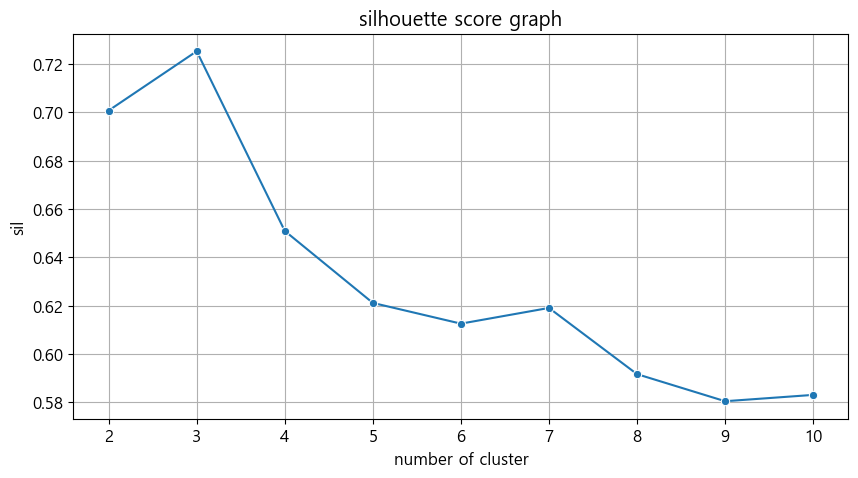

In [61]:
kmeans=KMeans(n_clusters=4,n_init=10,max_iter=100)
kmeans.fit(origin5_5)
y_pred=kmeans.predict(origin5_5)
score=silhouette_score(origin5_5,y_pred)

print("실루엣 점수: {0:.3f}".format(score))

score_list2=[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k,n_init=10,max_iter=100)
    kmeans.fit(origin5_5)
    y_pred=kmeans.predict(origin5_5)
    score=silhouette_score(origin5_5,y_pred)
    score_list2.append(score)

score_list2

plt.figure(figsize=(10,5))
sb.lineplot(x=range(2,11),y=score_list2,marker='o')
plt.title('silhouette score graph')
plt.xlabel('number of cluster')
plt.ylabel('sil')
plt.grid()
plt.show()
plt.close()

> 실루엣 스코어 확인 결과 군집을 3으로 설정했을 때 가장 높은 점수가 나옴.
> 여기서는 엘보우 차트 결과를 검증하는 쪽으로 진행

In [62]:
#n_clusters=7,n_init=10,max_iter=100
kmeans = KMeans(n_clusters=6,n_init=10,max_iter=100).fit(Z) #군집 4개로 나누겠다
origin5['cluster_id'] = kmeans.labels_
origin5.head()

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.062205,0.166880,0.133927,3
1,사직동,0.038269,0.038557,0.044126,0.184545,4
2,삼청동,0.602143,0.182711,0.118277,0.233276,0
3,부암동,0.602143,0.038414,0.144440,0.162233,2
4,평창동,0.602861,0.107249,0.658702,0.560716,0


c:\Users\kiman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


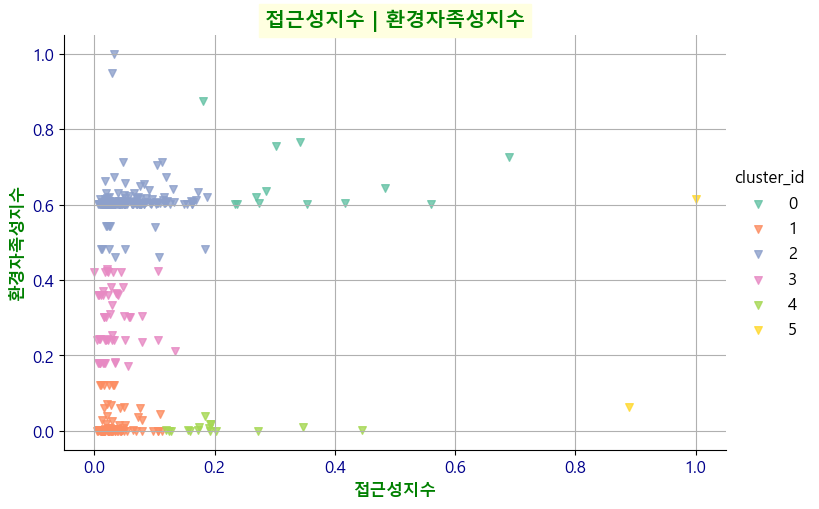

In [63]:
sb.lmplot(x='접근성지수minmax', y='그린지수minmax', data=origin5, 
          fit_reg=False, scatter_kws={"s": 30}, hue="cluster_id",aspect=1.5,palette='Set2',markers='v')
plt.title("접근성지수 | 환경자족성지수", color='green',fontweight='bold',backgroundcolor='lightyellow')
plt.xlabel('접근성지수', color='green',fontweight='bold')
plt.ylabel('환경자족성지수', color='green',fontweight='bold')
plt.xticks(fontsize=12,color='darkblue')
plt.yticks(fontsize=12,color='darkblue')
plt.grid()
plt.show()
plt.close()

In [64]:
origin5[origin5['cluster_id']==4]
origin5_final=DataFrame(origin5[origin5['cluster_id']==0])
origin5[origin5['cluster_id']==3]
origin5_final1=DataFrame(origin5[origin5['cluster_id']==5])

In [65]:
origin5[origin5['cluster_id']==0]

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
2,삼청동,0.602143,0.182711,0.118277,0.233276,0
4,평창동,0.602861,0.107249,0.658702,0.560716,0
40,한강로동,0.603270,0.096164,0.154034,0.417533,0
45,한남동,0.602143,0.021840,0.161413,0.236909,0
162,상계제1동,0.874020,0.016684,0.477411,0.181578,0
213,상암동,0.726448,0.072779,1.000000,0.689607,0
243,가양제1동,0.645265,0.020125,0.553051,0.483549,0
265,가산동,0.602313,0.030653,0.229707,0.354124,0
330,반포본동,0.603899,1.000000,0.992845,0.273210,0
340,양재제1동,0.766479,0.080960,0.366162,0.342199,0


In [66]:
origin5[origin5['cluster_id']==5]

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
8,종로1.2.3.4가동,0.063833,0.201658,0.451458,0.889024,5
275,여의동,0.614035,0.071520,0.925674,1.000000,5


In [67]:
origin555=origin5_final.merge(origin5_final1,on='읍면동명',how='outer')
origin555.head()

,읍면동명,그린지수minmax_x,여가생활지수minmax_x,사회적약자_지원_인프라_밀집도minmax_x,접근성지수minmax_x,cluster_id_x,그린지수minmax_y,여가생활지수minmax_y,사회적약자_지원_인프라_밀집도minmax_y,접근성지수minmax_y,cluster_id_y
0,삼청동,0.602143,0.182711,0.118277,0.233276,0.0,NaN,NaN,NaN,NaN,NaN
1,평창동,0.602861,0.107249,0.658702,0.560716,0.0,NaN,NaN,NaN,NaN,NaN
2,한강로동,0.603270,0.096164,0.154034,0.417533,0.0,NaN,NaN,NaN,NaN,NaN
3,한남동,0.602143,0.021840,0.161413,0.236909,0.0,NaN,NaN,NaN,NaN,NaN
4,상계제1동,0.874020,0.016684,0.477411,0.181578,0.0,NaN,NaN,NaN,NaN,NaN


In [68]:
origin555.to_excel('./교집합결과/접근성지수,그린지수voting1.xlsx')

> - 군집 확인 결과 `2`번 군집을 제외한 나머지 군집들은 수직적으로 분포되어있는 것을 확인.
> - 단 나머지 군집들도 우측으로 뻗어있으며 그 중 가장 결과값이 좋은 `0`번 군집 선정

> 접근성지수가 비교적 비슷하게 분포되어있는 만큼 그린지수가 높은 군집 `0` 지역을 이상적인 지역으로 판단하기로 결정.<br>
비록 군집 `0`의 분포가 상대적으로 산개되어 있지만 분석 목적은 밀집도가 아닌 가장 이상적인 지역을 도출하는 것임으로 군집 `0`을 사용하는 것이 타당하다고 판단.

### 여가생활지수, 사회적 약자지수

In [69]:
origin6=origin2.copy()
XX = origin6.iloc[:,[2,3]].values #x값으로 여가생활지수,사회적약자지수 지정
XX[:5]

array([[0.06220496, 0.16688035],
       [0.0385567 , 0.04412614],
       [0.18271093, 0.11827713],
       [0.03841368, 0.14444004],
       [0.1072489 , 0.65870172]])

#### 엘보우 메소드로 최적의 k값 예상

<Axes: >

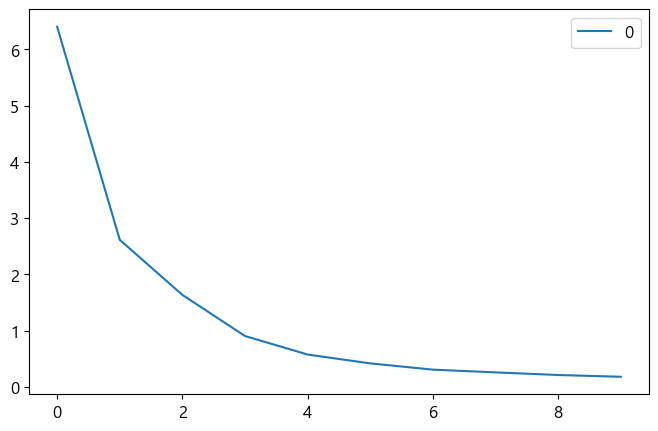

In [70]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k,n_init=10,max_iter=100).fit(XX)
    value = kmeans.inertia_
    inertia.append(value)

DataFrame(inertia).plot()

> 엘보우 그래프 확인 결과 4개에서 완만히 떨어지는 것으로 판단하여 군집수는 `4`로 결정

#### 실루엣 스코어로 최적의 k값 예상

In [71]:
origin6_6=origin6.drop('읍면동명',axis=1)

실루엣 점수: 0.651


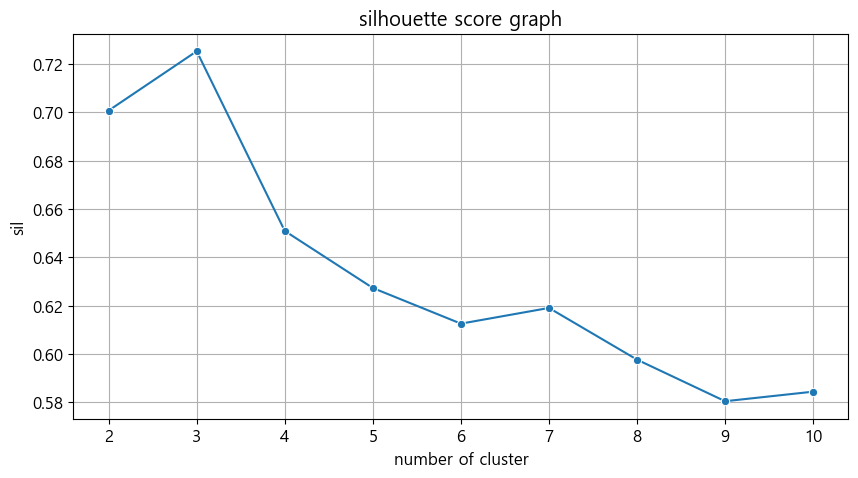

In [72]:
kmeans=KMeans(n_clusters=4,n_init=10,max_iter=100)
kmeans.fit(origin6_6)
y_pred=kmeans.predict(origin6_6)
score=silhouette_score(origin6_6,y_pred)

print("실루엣 점수: {0:.3f}".format(score))

score_list3=[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k,n_init=10,max_iter=100)
    kmeans.fit(origin6_6)
    y_pred=kmeans.predict(origin6_6)
    score=silhouette_score(origin6_6,y_pred)
    score_list3.append(score)

score_list3

plt.figure(figsize=(10,5))
sb.lineplot(x=range(2,11),y=score_list3,marker='o')
plt.title('silhouette score graph')
plt.xlabel('number of cluster')
plt.ylabel('sil')
plt.grid()
plt.show()
plt.close()

> 실루엣 스코어 확인 결과 4개로 설정했을 때 가장 높은 점수가 나와 4로 설정

In [73]:
#n_clusters=4,n_init=10,max_iter=100
kmeans = KMeans(n_clusters=6,n_init=10,max_iter=100).fit(XX) #군집 3개로 나누겠다
origin6['cluster_id'] = kmeans.labels_
origin6.head()

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.062205,0.166880,0.133927,0
1,사직동,0.038269,0.038557,0.044126,0.184545,1
2,삼청동,0.602143,0.182711,0.118277,0.233276,0
3,부암동,0.602143,0.038414,0.144440,0.162233,0
4,평창동,0.602861,0.107249,0.658702,0.560716,2


c:\Users\kiman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


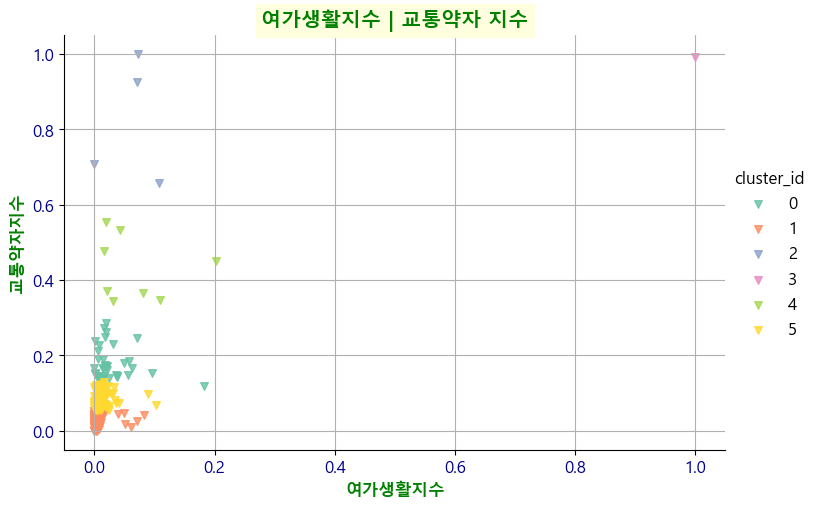

In [74]:
sb.lmplot(x='여가생활지수minmax', y='사회적약자_지원_인프라_밀집도minmax', data=origin6, 
          fit_reg=False, scatter_kws={"s": 30}, hue="cluster_id",aspect=1.5,palette='Set2',markers='v')
plt.title("여가생활지수 | 교통약자 지수", color='green',fontweight='bold',backgroundcolor='lightyellow')
plt.xlabel('여가생활지수', color='green',fontweight='bold')
plt.ylabel('교통약자지수', color='green',fontweight='bold')
plt.xticks(fontsize=12,color='darkblue')
plt.yticks(fontsize=12,color='darkblue')
plt.grid()
plt.show()
plt.close()

In [75]:
origin6[origin6['cluster_id']==3]
origin6_final=DataFrame(origin6[origin6['cluster_id']==3])
origin6[origin6['cluster_id']==2]
origin6_final1=DataFrame(origin6[origin6['cluster_id']==2])

In [76]:
origin666=origin6_final.merge(origin6_final1,on='읍면동명',how='outer')
origin666

,읍면동명,그린지수minmax_x,여가생활지수minmax_x,사회적약자_지원_인프라_밀집도minmax_x,접근성지수minmax_x,cluster_id_x,그린지수minmax_y,여가생활지수minmax_y,사회적약자_지원_인프라_밀집도minmax_y,접근성지수minmax_y,cluster_id_y
0,반포본동,0.603899,1.0,0.992845,0.27321,3.0,NaN,NaN,NaN,NaN,NaN
1,평창동,NaN,NaN,NaN,NaN,NaN,0.602861,0.107249,0.658702,0.560716,2.0
2,상암동,NaN,NaN,NaN,NaN,NaN,0.726448,0.072779,1.000000,0.689607,2.0
3,여의동,NaN,NaN,NaN,NaN,NaN,0.614035,0.071520,0.925674,1.000000,2.0
4,둔촌제1동,NaN,NaN,NaN,NaN,NaN,0.421500,0.000000,0.708442,0.000000,2.0


In [77]:
origin666_final=DataFrame(origin666)
origin666_final.to_excel('./교집합결과/여가생활,사회적약자voting1.xlsx')

> 군집 확인 결과 `2`,`3`번 군집의 경우 데이터가 없어서 정상적인 군집이 아니라고 판단, `0`번 군집의 경우 사회적 약자지수 수치가 0.2에 많이 몰려있고 반대로 `1`번 군집의 경우 문화시민 지수가 0.2~0.4로 우측으로 많이 뻗어있는 것을 확인할 수 있음. 정석적인 군집이라면 몰려있는 0번 군집이 타당하나 x축,y축 그래프에 세팅한 것이 특정 변수를 합친 파생지수이기 때문에(둘 중 하나라도 수치가 높아야 보행 일상권에 정의에 해당되므로) 수치가 상대적으로 높은 `1`번 군집으로 선정

> 군집 `2`, `3`은 데이터가 적어 다양한 지역을 필요로 하는 입지 선정 데이터로 사용하기에는 무리가 있다고 판단해 군집 `0`, `1`을 중심으로 결과를 해석.<br>
비교적 군집이 잘 이루어 지고 분석에 사용한 지수가 비교적 양에 분포되어있는 군집 `1`을 이상적인 지역으로 판단, 입지선정 자료로 사용하기로 결정.

### 여가생활지수, 접근성 지수

In [78]:
origin7=origin2.copy()
YY = origin7.iloc[:,[2,4]].values #x값으로 여가생활지수,접근성지수 지정
YY[:5]

array([[0.06220496, 0.1339273 ],
       [0.0385567 , 0.18454452],
       [0.18271093, 0.23327645],
       [0.03841368, 0.16223314],
       [0.1072489 , 0.56071557]])

#### 엘보우 메소드로 최적의 k값 예상

<Axes: >

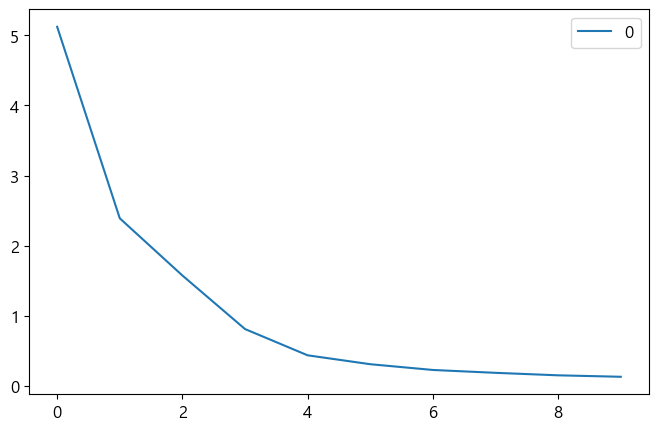

In [79]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k,n_init=10,max_iter=100).fit(YY)
    value = kmeans.inertia_
    inertia.append(value)

DataFrame(inertia).plot()

> 엘보우 그래프 확인 결과 4개째에서 완만하게 떨어지는 것으로 보여 군집 수는 4개로 결정

#### 실루엣 스코어로 최적의 k값 예상

In [80]:
origin7_7=origin7.drop('읍면동명',axis=1)

실루엣 점수: 0.651


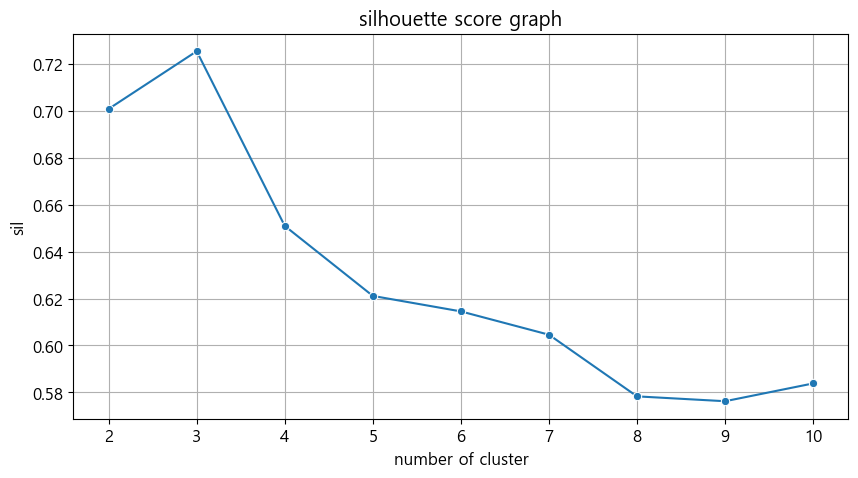

In [81]:
kmeans=KMeans(n_clusters=4,n_init=10,max_iter=100)
kmeans.fit(origin7_7)
y_pred=kmeans.predict(origin7_7)
score=silhouette_score(origin7_7,y_pred)

print("실루엣 점수: {0:.3f}".format(score))

score_list4=[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k,n_init=10,max_iter=100)
    kmeans.fit(origin7_7)
    y_pred=kmeans.predict(origin7_7)
    score=silhouette_score(origin7_7,y_pred)
    score_list4.append(score)

score_list4

plt.figure(figsize=(10,5))
sb.lineplot(x=range(2,11),y=score_list4,marker='o')
plt.title('silhouette score graph')
plt.xlabel('number of cluster')
plt.ylabel('sil')
plt.grid()
plt.show()
plt.close()

> 실루엣 그래프 확인 결과 마찬가지로 군집수를 4로 설정했을 때 가장 높은 점수를 보여 4로 결정

In [82]:
#n_clusters=3,n_init=10,max_iter=100
kmeans = KMeans(n_clusters=6,n_init=10,max_iter=100).fit(YY) #군집 4개로 나누겠다
origin7['cluster_id'] = kmeans.labels_
origin7.head()

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.062205,0.166880,0.133927,5
1,사직동,0.038269,0.038557,0.044126,0.184545,5
2,삼청동,0.602143,0.182711,0.118277,0.233276,5
3,부암동,0.602143,0.038414,0.144440,0.162233,5
4,평창동,0.602861,0.107249,0.658702,0.560716,4


c:\Users\kiman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


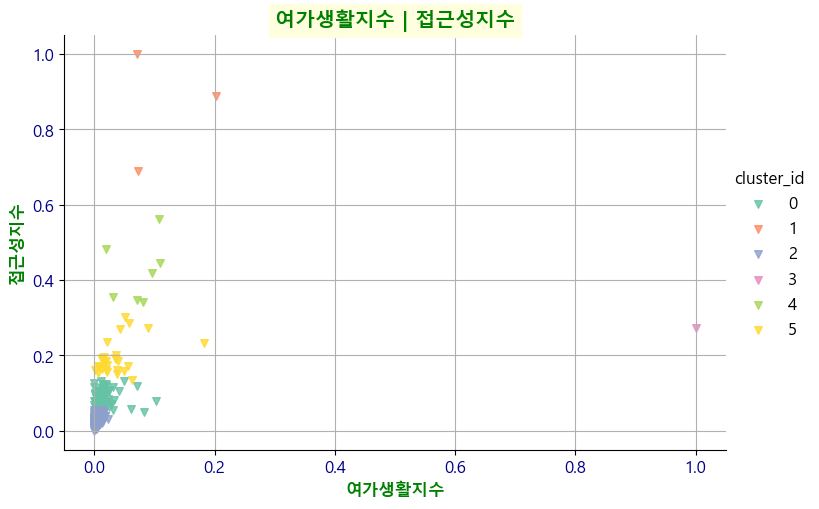

In [83]:
sb.lmplot(x='여가생활지수minmax', y='접근성지수minmax', data=origin7, 
          fit_reg=False, scatter_kws={"s": 30}, hue="cluster_id",aspect=1.5,palette='Set2',markers='v')
plt.title("여가생활지수 | 접근성지수", color='green',fontweight='bold',backgroundcolor='lightyellow')
plt.xlabel('여가생활지수', color='green',fontweight='bold')
plt.ylabel('접근성지수', color='green',fontweight='bold')
plt.xticks(fontsize=12,color='darkblue')
plt.yticks(fontsize=12,color='darkblue')
plt.xticks(fontsize=12,color='darkblue')
plt.yticks(fontsize=12,color='darkblue')
plt.grid()
plt.show()
plt.close()

In [86]:
origin7_final=DataFrame(origin7[origin7['cluster_id']==1])
origin7_final1=DataFrame(origin7[origin7['cluster_id']==4])

In [87]:
origin777=origin7_final.merge(origin7_final1,on='읍면동명',how='outer')
origin777

,읍면동명,그린지수minmax_x,여가생활지수minmax_x,사회적약자_지원_인프라_밀집도minmax_x,접근성지수minmax_x,cluster_id_x,그린지수minmax_y,여가생활지수minmax_y,사회적약자_지원_인프라_밀집도minmax_y,접근성지수minmax_y,cluster_id_y
0,종로1.2.3.4가동,0.063833,0.201658,0.451458,0.889024,1.0,NaN,NaN,NaN,NaN,NaN
1,상암동,0.726448,0.072779,1.000000,0.689607,1.0,NaN,NaN,NaN,NaN,NaN
2,여의동,0.614035,0.071520,0.925674,1.000000,1.0,NaN,NaN,NaN,NaN,NaN
3,평창동,NaN,NaN,NaN,NaN,NaN,0.602861,0.107249,0.658702,0.560716,4.0
4,소공동,NaN,NaN,NaN,NaN,NaN,0.009355,0.070369,0.245428,0.346411,4.0
5,명동,NaN,NaN,NaN,NaN,NaN,0.003588,0.109953,0.348319,0.445224,4.0
6,한강로동,NaN,NaN,NaN,NaN,NaN,0.603270,0.096164,0.154034,0.417533,4.0
7,가양제1동,NaN,NaN,NaN,NaN,NaN,0.645265,0.020125,0.553051,0.483549,4.0
8,가산동,NaN,NaN,NaN,NaN,NaN,0.602313,0.030653,0.229707,0.354124,4.0
9,양재제1동,NaN,NaN,NaN,NaN,NaN,0.766479,0.080960,0.366162,0.342199,4.0


In [88]:
origin777.to_excel('./교집합결과/여가생활,접근성지수voting1.xlsx')

> - 군집 확인 결과 `3`번 군집은 데이터가 2개밖에 없어 비정상 군집으로 분류, `1`번 군집 또한 데이터가 부족하다고 판단,
> - `2`번 군집이 가장 적절하다고 판단되어 2번 군집 선정

> 군집 `1`, `3`은 데이터가 적어 다양한 지역을 필요로 하는 입지 선정 데이터로 사용하기에는 무리가 있다고 판단해 군집 `0`, `2`를 중심으로 결과를 해석.<br>
비교적 군집이 잘 이루어 지고 분석에 사용한 지수가 비교적 양에 분포되어있는 군집 `2`를 이상적인 지역으로 판단, 입지선정 자료로 사용하기로 결정.

### 사회적약자지수, 접근성 지수

In [89]:
origin8=origin2.copy()
ZZ = origin8.iloc[:,[3,4]].values #x값으로 사회적약자지수,접근성지수 지정
ZZ[:5]

array([[0.16688035, 0.1339273 ],
       [0.04412614, 0.18454452],
       [0.11827713, 0.23327645],
       [0.14444004, 0.16223314],
       [0.65870172, 0.56071557]])

#### 엘보우 메소드로 최적의 k값 예상

<Axes: >

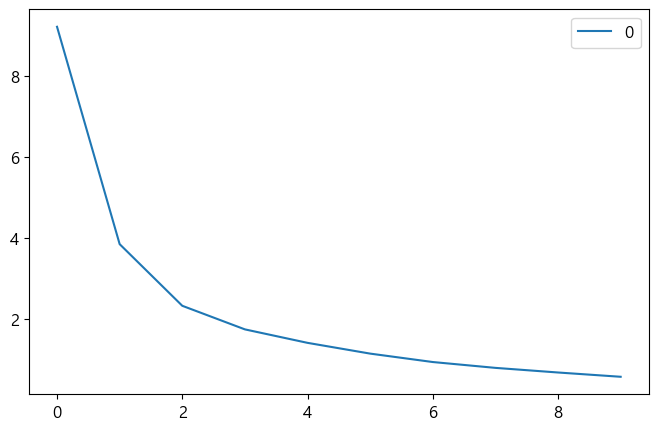

In [90]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k,n_init=10,max_iter=100).fit(ZZ)
    value = kmeans.inertia_
    inertia.append(value)

DataFrame(inertia).plot()

> 엘보우 그래프 확인 결과 4개 즈음에 완만하게 떨어지는것으로 보여지나 확실하지 않아 실루엣 그래프로 재확인

#### 실루엣 스코어로 최적의 k값 예상

In [91]:
origin8_8=origin8.drop('읍면동명',axis=1)

실루엣 점수: 0.651


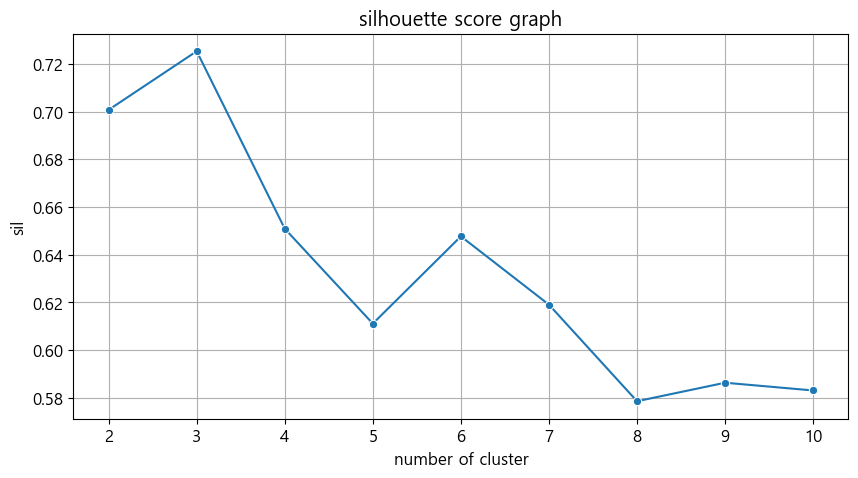

In [92]:
kmeans=KMeans(n_clusters=4,n_init=10,max_iter=100)
kmeans.fit(origin8_8)
y_pred=kmeans.predict(origin8_8)
score=silhouette_score(origin8_8,y_pred)

print("실루엣 점수: {0:.3f}".format(score))

score_list5=[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k,n_init=10,max_iter=100)
    kmeans.fit(origin8_8)
    y_pred=kmeans.predict(origin8_8)
    score=silhouette_score(origin8_8,y_pred)
    score_list5.append(score)

score_list5

plt.figure(figsize=(10,5))
sb.lineplot(x=range(2,11),y=score_list5,marker='o')
plt.title('silhouette score graph')
plt.xlabel('number of cluster')
plt.ylabel('sil')
plt.grid()
plt.show()
plt.close()

> 실루엣 스코어 확인 결과 군집을 4개로 설정했을 때 가장 높은 점수가 나와 4로 결정

In [93]:
kmeans = KMeans(n_clusters=6,n_init=10,max_iter=100).fit(ZZ) #군집 4개로 나누겠다
origin8['cluster_id'] = kmeans.labels_
origin8.head()

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.062205,0.166880,0.133927,2
1,사직동,0.038269,0.038557,0.044126,0.184545,2
2,삼청동,0.602143,0.182711,0.118277,0.233276,2
3,부암동,0.602143,0.038414,0.144440,0.162233,2
4,평창동,0.602861,0.107249,0.658702,0.560716,1


c:\Users\kiman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


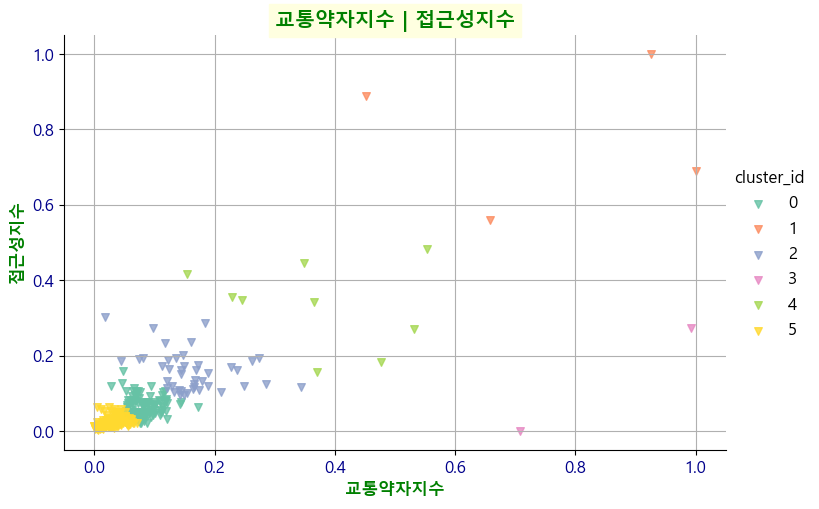

In [94]:
sb.lmplot(x='사회적약자_지원_인프라_밀집도minmax', y='접근성지수minmax', data=origin8, 
          fit_reg=False, scatter_kws={"s": 30}, hue="cluster_id",aspect=1.5,palette='Set2',markers='v')
plt.title("교통약자지수 | 접근성지수", color='green',fontweight='bold',backgroundcolor='lightyellow')
plt.xlabel('교통약자지수', color='green',fontweight='bold')
plt.ylabel('접근성지수', color='green',fontweight='bold')
plt.xticks(fontsize=12,color='darkblue')
plt.yticks(fontsize=12,color='darkblue')
plt.xticks(fontsize=12,color='darkblue')
plt.yticks(fontsize=12,color='darkblue')
plt.grid()
plt.show()
plt.close()

In [95]:
origin8_final=DataFrame(origin8[origin8['cluster_id']==1])
origin8_final1=DataFrame(origin8[origin8['cluster_id']==3])

In [96]:
origin888=origin8_final.merge(origin8_final1,on='읍면동명',how='outer')

In [97]:
origin888.to_excel('./교집합결과/사회적약자,접근성지수voting1.xlsx')

> - 군집 확인 결과 수직으로 분포되어있는 점 확인
> - `1`,`3`번 군집은 데이터 수치가 작아 정상적인 군집이 아니라고 판단하여 `2번` 군집 선정

In [112]:
origin=read_excel('행정동병합최종.xlsx')

origin1=origin.filter(['읍면동명','접근성지수minmax','그린지수minmax','사회적약자_지원_인프라_밀집도minmax','여가생활지수minmax'])
origin1.to_excel('test1.xlsx')